<a href="https://colab.research.google.com/github/Rohit7798-ai/Numpy_tutorial/blob/main/pandas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('googleplaystore.csv')

In [ ]:
!pip install missingno


In [ ]:
import missingno as msno


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: >

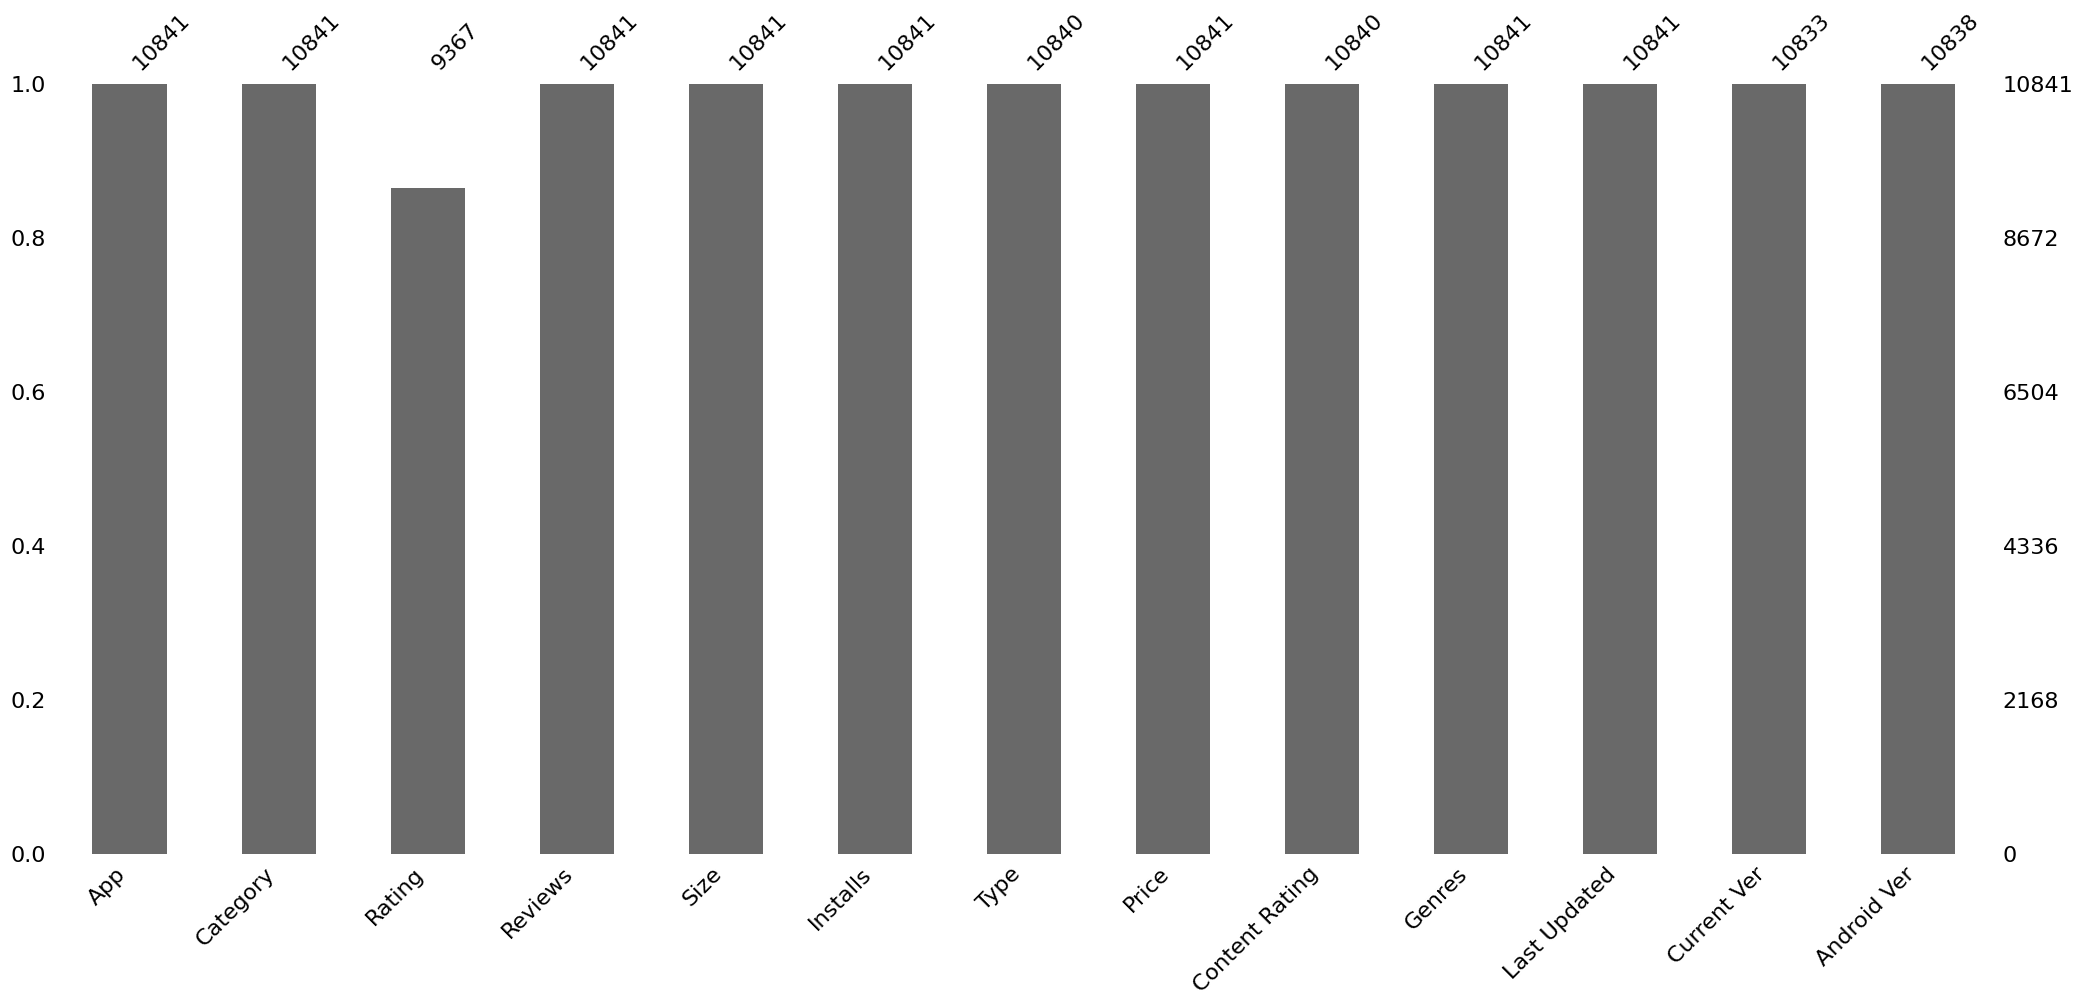

In [ ]:
msno.bar(df)

In [ ]:
df.isna().sum().sort_values(ascending = False)

,0
Rating,1474
Current Ver,8
Android Ver,3
Content Rating,1
Type,1
Size,0
Reviews,0
Category,0
App,0
Price,0


<Axes: ylabel='Frequency'>

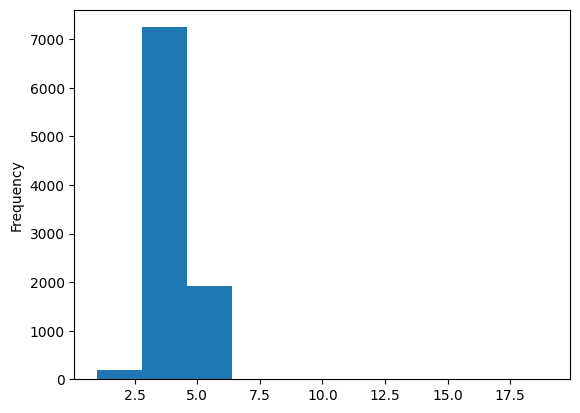

In [ ]:
df['Rating'].plot(kind = 'hist')

In [ ]:
df['Rating'].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.loc[df['Rating'] > 5 , 'Rating' ] = np.nan

In [ ]:
df['Rating'].mean()

np.float64(4.191757420456972)

In [ ]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

<ipython-input-14-39d8e0ab3bf4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


**How many duplicated apps are there?**

In [ ]:
app_counts = df['App'].value_counts()
duplicate_apps = app_counts[app_counts>1]
total = duplicate_apps.sum()

In [ ]:
total

np.int64(1979)



---



---



**Drop duplicated apps keeping only the ones with the greatest number of reviews**

In [ ]:
df['Reviews'].max()

78158306.0

In [ ]:
sort = df.sort_values( by = ['App' , 'Reviews'] , ascending = [True , False])

In [ ]:
sort.drop_duplicates( subset = 'App' , keep = 'first').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.191757,27.0,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.500000,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.500000,259.0,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.700000,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
5940,058.ba,NEWS_AND_MAGAZINES,4.400000,27.0,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up
10252,1. FC Köln App,SPORTS,4.600000,2019.0,41M,"100,000+",Free,0,Everyone,Sports,"July 20, 2018",1.13.0,4.4 and up
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8483,10 Minutes a Day Times Tables,FAMILY,4.100000,681.0,48M,"100,000+",Free,0,Everyone,Education,"July 3, 2014",1.2,2.2 and up
7738,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.500000,10.0,3.8M,100+,Paid,$1.49,Everyone,Communication,"May 12, 2018",2.1.4,2.1 and up




---



---



**Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.**

In [ ]:
df['Category']

,Category
0,ART_AND_DESIGN
1,ART_AND_DESIGN
2,ART_AND_DESIGN
3,ART_AND_DESIGN
4,ART_AND_DESIGN
...,...
10836,FAMILY
10837,FAMILY
10838,MEDICAL
10839,BOOKS_AND_REFERENCE


In [ ]:
df['Category'] = df['Category'].str.replace('_' , ' ' , regex = False)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.100000,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.900000,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.700000,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.500000,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.300000,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS AND REFERENCE,4.500000,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df['Category'] = df['Category'].str.capitalize()

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.100000,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.900000,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.700000,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.500000,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.300000,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,Medical,4.191757,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books and reference,4.500000,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Clean and convert the Installs column to numeric type**

In [ ]:
df['Installs'] = df['Installs'].str.replace('+' , ' ' , regex = False)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.100000,159.0,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.900000,967.0,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.700000,87510.0,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.500000,215644.0,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.300000,967.0,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38.0,53M,"5,000",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4.0,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,Medical,4.191757,3.0,9.5M,"1,000",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books and reference,4.500000,114.0,Varies with device,"1,000",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Clean and convert the Size column to numeric (representing bytes)**

In [ ]:

def size_to_bytes(s):
  s = str(s).lower().replace(',' , ' ').replace('+' , ' ').strip()
  if s.endswith('M'):
    return float(s[:-1]) * 1024 * 1024
  elif s.endswith('k'):
    return float(s[:-1]) * 1024
  try:
    return float(s)
  except:
    return 0
df['Size'] = df['Size'].apply(size_to_bytes).astype(int)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Clean and convert the Price column to numeric**

In [ ]:
df['Price'] = df['Price'].str.replace('$' , '' , regex = False)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Paid or free?**

In [ ]:
df['Distribution'] = df['Type']

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Free
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Free
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Free
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Free


**Which app has the most reviews?**

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Free
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Free
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Free
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Free


In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
max_value = df['Reviews'].max()


In [ ]:
max_value

78158306.0

In [ ]:
df.loc[df['Reviews'] == 78158306.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Free


**What category has the highest number of apps uploaded to the store?**

In [ ]:
value_counts = df['Category'].value_counts()

In [ ]:
value_counts.max()

1972

In [ ]:
category_counts = df['Category'].value_counts()

# Get the category with the highest number of apps
top_category = category_counts.idxmax()
top_count = category_counts.max()


In [ ]:
top_category

'FAMILY'

In [ ]:
df.sort_values( by = ['Price'] , ascending = False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,0
4697,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,NaN,2.0,17M,50+,Paid,9.99,Everyone,Auto & Vehicles,"June 25, 2018",3.0.0,4.0 and up,Paid
9409,Vital Tones EI Pro,HEALTH_AND_FITNESS,NaN,2.0,85M,50+,Paid,9.99,Everyone,Health & Fitness,"December 1, 2017",1.4,4.0 and up,Paid
2259,Diabetes & Diet Tracker,MEDICAL,4.6,395.0,19M,"1,000+",Paid,9.99,Everyone,Medical,"July 16, 2018",6.5.1,5.0 and up,Paid
3441,BIG Launcher,PERSONALIZATION,4.3,881.0,5.9M,"10,000+",Paid,9.99,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up,Paid


**What's the name of the most expensive game?**

In [ ]:
df.query('Category == "GAME"').sort_values(by='Price', ascending=False).head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
1838,Star Wars ™: DIRTY,GAME,4.5,38207.0,15M,"100,000+",Paid,9.99,Teen,Role Playing,"October 19, 2015",1.0.6,4.1 and up,Paid
6198,Backgammon NJ for Android,GAME,4.4,1644.0,15M,"10,000+",Paid,7.99,Everyone,Board,"April 5, 2017",4.1,2.3.3 and up,Paid
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26M,"1,000,000+",Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,Paid
6538,The Legacy (Full),GAME,4.6,144.0,6.3M,"1,000+",Paid,6.99,Everyone,Adventure,"May 15, 2018",1.0.9,4.0 and up,Paid
1837,Call of Duty:Black Ops Zombies,GAME,4.2,13004.0,46M,"100,000+",Paid,6.99,Teen,Action,"December 20, 2016",1.0.11,2.3.3 and up,Paid


**Which is the most popular Finance App?**

In [ ]:
df.query('Category == "FINANCE"').sort_values(by='Installs', ascending=False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
1048,K PLUS,FINANCE,4.4,124424.0,Varies with device,NaN,Free,0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up,Free
1049,ING Banking,FINANCE,4.4,39041.0,Varies with device,NaN,Free,0,Everyone,Finance,"August 3, 2018",Varies with device,Varies with device,Free
1050,Citibanamex Movil,FINANCE,3.6,52306.0,42M,NaN,Free,0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up,Free
1051,The postal bank,FINANCE,3.7,36718.0,Varies with device,NaN,Free,0,Everyone,Finance,"July 16, 2018",Varies with device,Varies with device,Free
1052,KTB Netbank,FINANCE,3.8,42644.0,19M,NaN,Free,0,Everyone,Finance,"June 28, 2018",8.18,4.2 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10718,BankNordik,FINANCE,3.9,28.0,15M,NaN,Free,0,Everyone,Finance,"August 8, 2018",7.3.2,5.0 and up,Free
10744,FP Markets,FINANCE,NaN,1.0,2.0M,NaN,Free,0,Everyone,Finance,"January 30, 2018",1.0.0.0,4.3 and up,Free
10745,FP Boss,FINANCE,NaN,1.0,5.8M,NaN,Free,0,Everyone,Finance,"July 27, 2018",1.0.2,5.0 and up,Free
10752,FP FCU,FINANCE,3.6,48.0,26M,NaN,Free,0,Everyone,Finance,"April 5, 2018",4.6.71,4.0.3 and up,Free


**What Teen Game has the most reviews?**

In [ ]:
df.query('Category == "GAME" and `Content Rating` == "Teen"').sort_values(by='Reviews', ascending=False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
3912,Asphalt 8: Airborne,GAME,4.5,8389714.0,92M,NaN,Free,0,Teen,Racing,"July 4, 2018",3.7.1a,4.0.3 and up,Free
5417,Mobile Legends: Bang Bang,GAME,4.4,8219586.0,99M,NaN,Free,0,Teen,Action,"July 24, 2018",1.2.97.3042,4.0.3 and up,Free
1988,Hungry Shark Evolution,GAME,4.5,6074627.0,100M,NaN,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,Free
1758,Hungry Shark Evolution,GAME,4.5,6074334.0,100M,NaN,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,Free
3973,Hungry Shark Evolution,GAME,4.5,6071542.0,100M,NaN,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,AK Blackjack,GAME,NaN,4.0,7.6M,NaN,Free,0,Teen,Card,"July 30, 2018",1.3,4.1 and up,Free
6335,BJ card game blackjack,GAME,NaN,3.0,21M,NaN,Free,0,Teen,Card,"December 2, 2016",1.0,2.3 and up,Free
6555,Sic Bo,GAME,NaN,1.0,11M,NaN,Paid,1.99,Teen,Card,"August 27, 2013",1.0.0,2.2 and up,Paid
6329,Basic Strategy Training BJ 21,GAME,NaN,0.0,23M,NaN,Free,0,Teen,Casino,"March 7, 2016",1.1,2.3 and up,Free


**Which is the free game with the most reviews?**

In [ ]:
df.query('Category == "GAME" and `Type` == "Free"').sort_values(by='Reviews', ascending=False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
1879,Clash of Clans,GAME,4.6,44893888.0,98M,NaN,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,Free
1670,Clash of Clans,GAME,4.6,44891723.0,98M,NaN,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,Free
1704,Clash of Clans,GAME,4.6,44891723.0,98M,NaN,Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,Free
1917,Subway Surfers,GAME,4.5,27725352.0,76M,NaN,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,Free
1872,Subway Surfers,GAME,4.5,27725352.0,76M,NaN,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5855,Ay Vamos - PJ. Balvin - Piano,GAME,NaN,0.0,29M,NaN,Free,0,Everyone,Arcade,"July 9, 2018",1.0,4.1 and up,Free
6738,BS Chopper,GAME,NaN,0.0,41M,NaN,Free,0,Everyone,Racing,"October 5, 2017",1.0,4.1 and up,Free
6832,Bu Nedir ?,GAME,NaN,0.0,33M,NaN,Free,0,Everyone,Trivia,"April 15, 2018",3.1.6z,4.0.3 and up,Free
6842,Nedir Bu ?,GAME,NaN,0.0,33M,NaN,Free,0,Everyone,Trivia,"March 18, 2018",3.1.6z,4.0.3 and up,Free
